In [6]:
import pandas as pd
import numpy as np
import hypertools as hyp
import seaborn as sns
%matplotlib notebook

In [7]:
#load in the data

fname = 'At Risk Students For Dartmouth.xlsx'
sheet1 = 'Year 16-17'
sheet2 = 'Year 17-18 9.25.17'
columns = ('id', 'grade', 'age', 'school', 'sex', 'homeless', 'disadvantaged', 'specialneeds',
           'excused1', 'unexcused1', 'tardy1',
           'excused2', 'unexcused2', 'tardy2',
           'excused3', 'unexcused3', 'tardy3',
           'excused4', 'unexcused4', 'tardy4')
y1_data = pd.read_excel(fname, sheetname=sheet1, skiprows=[0], names=columns)
y2_data = pd.read_excel(fname, sheetname=sheet2, skiprows=[0], names=columns)

#use student IDs as the index
y1_data.set_index('id', inplace=True)
y2_data.set_index('id', inplace=True)

In [8]:
pd.unique(y1_data['specialneeds'])

array([nan, 504, 'IEP'], dtype=object)

In [9]:
#do some data cleaning

#in "disadvantaged" column, replace "YES" with 1 and NaN with 0
y1_data['disadvantaged'] = y1_data['disadvantaged'].map({np.nan: 0, 'YES': 1})
y2_data['disadvantaged'] = y2_data['disadvantaged'].map({np.nan: 0, 'YES': 1})

#in "specialneeds" column, 
y1_data['specialneeds'] = y1_data['specialneeds'].map({np.nan: 0, 504: '504', 'IEP': 'IEP'})
y2_data['specialneeds'] = y2_data['specialneeds'].map({np.nan: 0, 504: '504', 'IEP': 'IEP'})

#replace '---' with 0 (Fourth marking period columns)
y1_data.replace('---', 0, inplace=True)
y2_data.replace('---', 0, inplace=True)

In [10]:
y1_data.head()

,grade,age,school,sex,homeless,disadvantaged,specialneeds,excused1,unexcused1,tardy1,excused2,unexcused2,tardy2,excused3,unexcused3,tardy3,excused4,unexcused4,tardy4
id,,,,,,,,,,,,,,,,,,,
300053,10,16,Hartford High School/HACTC,F,N,1,0,22,0,0,0,0,0,0,0,1,2,2,0
300339,12,18,Hartford High School/HACTC,F,N,0,0,4,2,4,13,9,6,27,15,5,36,15,7
300340,11,17,Hartford High School/HACTC,M,N,0,0,1,0,0,5,1,1,3,0,5,24,0,1
300344,9,15,Hartford High School/HACTC,M,N,0,0,0,0,0,15,0,0,0,1,0,3,0,0
300345,8,15,Hartford Memorial Middle School,M,N,0,504,0,0,0,3,0,1,4,0,1,5,0,3


<IPython.core.display.Javascript object>


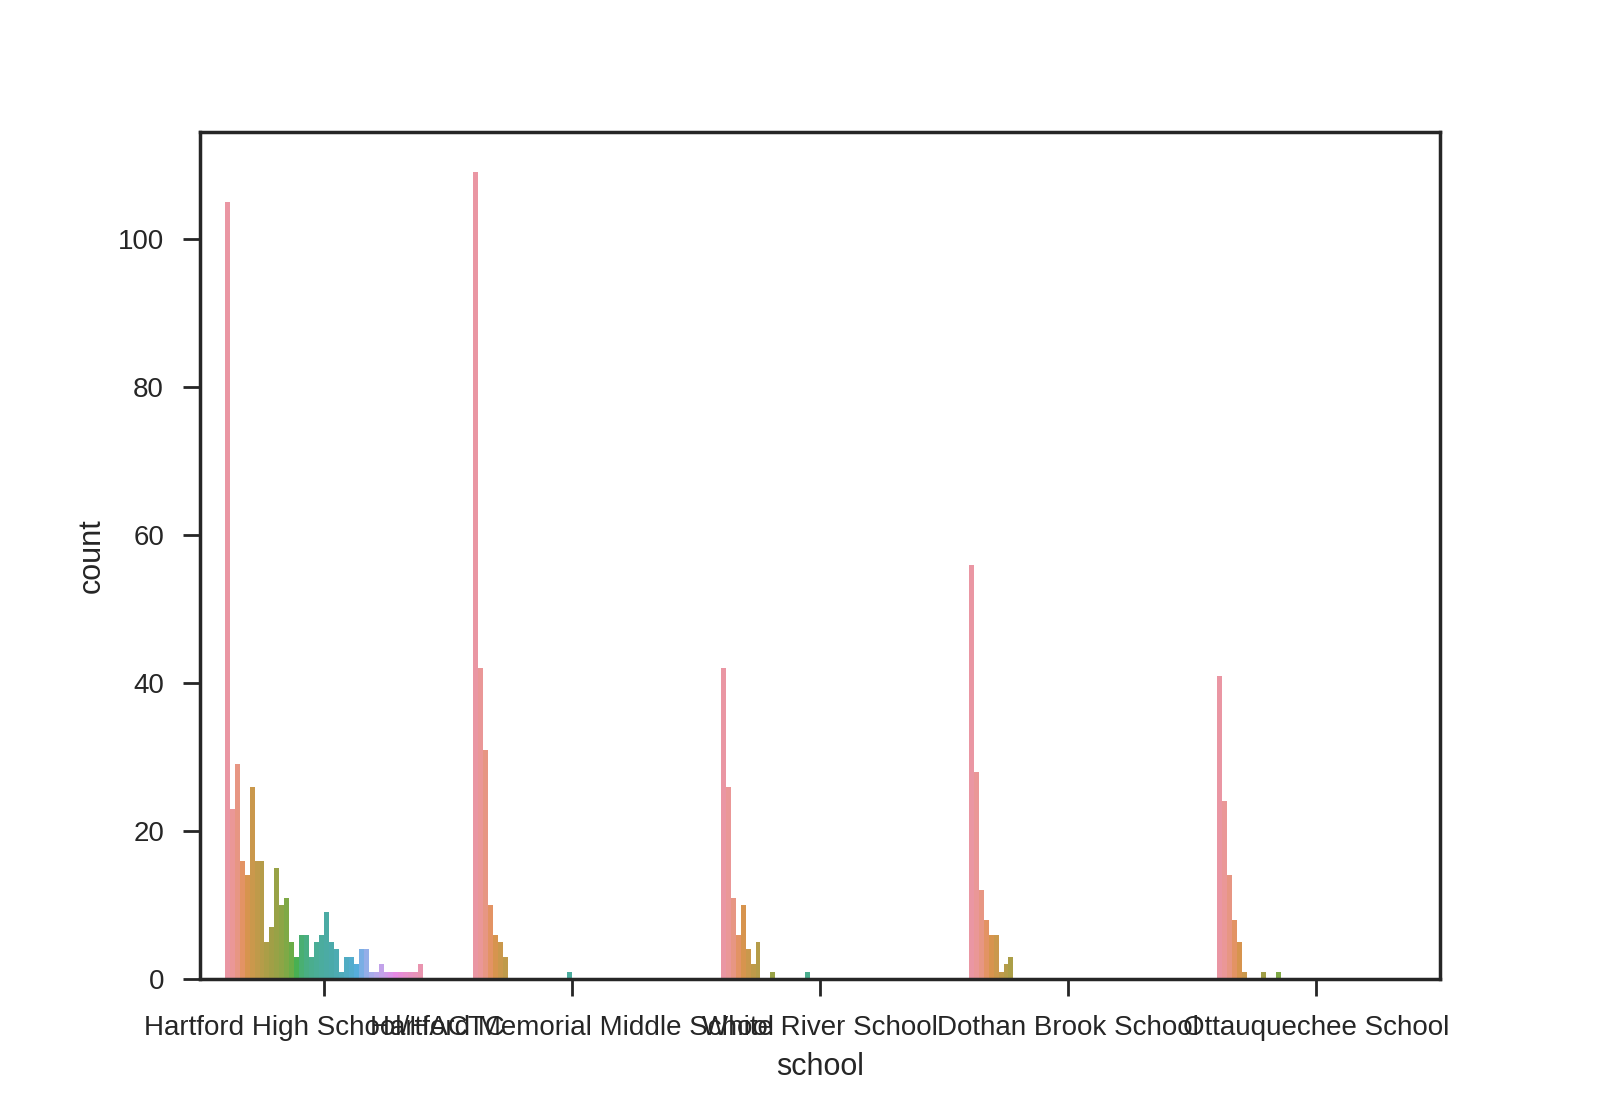

In [15]:
ax = sns.countplot(data=y1_data, x='school', hue='excused1')
ax.legend_.remove()
sns.plt.show()